# Equivalent layer technique for estimating total magnetization direction: Analysis of the result

## Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import cPickle as pickle
import datetime
import timeit
import string as st

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from fatiando.gridder import regular

In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_analysis.ipynb'

## Plot style

In [4]:
plt.style.use('ggplot')

## Importing my package

In [5]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [6]:
import auxiliary_functions as fc

## Loading model

In [7]:
with open('data/model_multi.pickle') as f:
        model_multi = pickle.load(f)

## Loading observation points

In [8]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

## Loading data set

In [9]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

## Loading results

In [10]:
with open('data/result_RM_airb.pickle') as f:
        results = pickle.load(f)

## List of saved files

In [11]:
saved_files = []

## Observation area

In [12]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 5500.0 m 
 x_min = -6500.0 m 
 y_max = 6500.0 m 
 y_min = -5500.0 m


## Airborne survey information

In [13]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (49,25)
Number of data: 1225.0
dx: 250.0 m
dy: 500.0 m 


## Properties of the model

### Main field

In [14]:
inc_gf,dec_gf = model_multi['main_field']

In [15]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -40.0 degree
Main field declination: -22.0 degree


### Magnetization direction

In [16]:
print 'Inclination: %.1f degree' % model_multi['inc_R']
print 'Declination: %.1f degree' % model_multi['dec_R']

Inclination: -25.0 degree
Declination: 30.0 degree


In [17]:
inc_R,dec_R = model_multi['inc_R'],model_multi['dec_R']

### Coordinates equivalent sources

In [18]:
h = results['layer_depth']

In [19]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [20]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

## The best solution using L-curve

In [21]:
m_LM = results['magnetic_moment'][4]
inc_est = results['inc_est'][4]
dec_est = results['dec_est'][4]

In [22]:
mu = results['reg_parameter'][4]

In [23]:
phi = results['phi'][4]

In [24]:
print mu

350000.0


## Visualization of the convergence

In [25]:
phi = (np.array(phi)/airborne['x'].size)

/home/andrelreis/anaconda3/envs/py2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


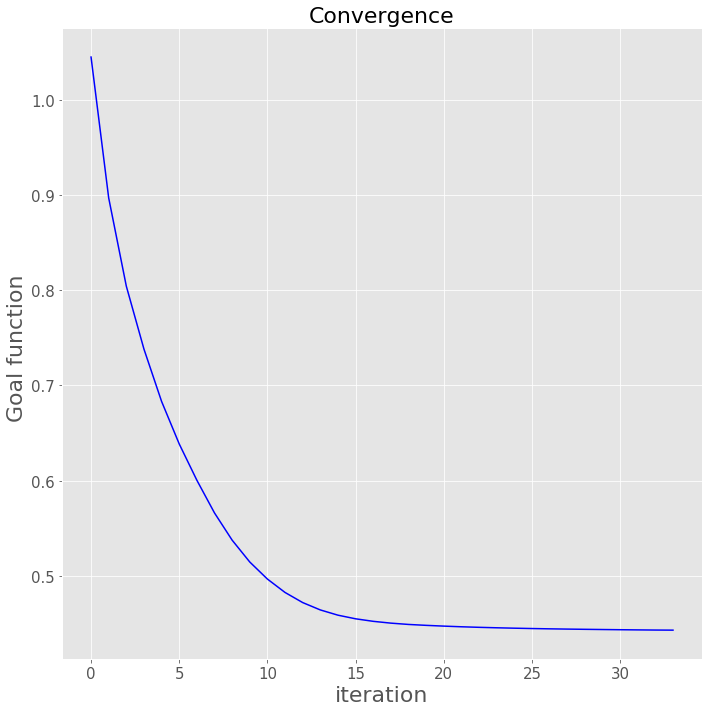

In [26]:
title_font = 22
bottom_font = 20
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.plot(phi,'b-',linewidth=1.5)
plt.title('Convergence', fontsize=title_font)
plt.xlabel('iteration', fontsize = title_font)
plt.ylabel('Goal function ', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/convergence_LM_NNLS_magRM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

## Estimated magnetization direction

In [27]:
print (inc_est,dec_est)

(-30.261432315196036, 27.745251051985854)


In [28]:
print (inc_R,dec_R)

(-25.0, 30.0)


## Comparison between observed data and predicted data

In [29]:
pred = fc.tfa_layer(airborne['x'],airborne['y'],airborne['z'],
                    xs,ys,zs,inc_gf,dec_gf,m_LM,inc_est,dec_est)

In [30]:
res = pred - data['tfa_obs_RM_airb']

In [31]:
r_norm,r_mean,r_std = fc.residual(data['tfa_obs_RM_airb'],pred)

/home/andrelreis/anaconda3/envs/py2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/andrelreis/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


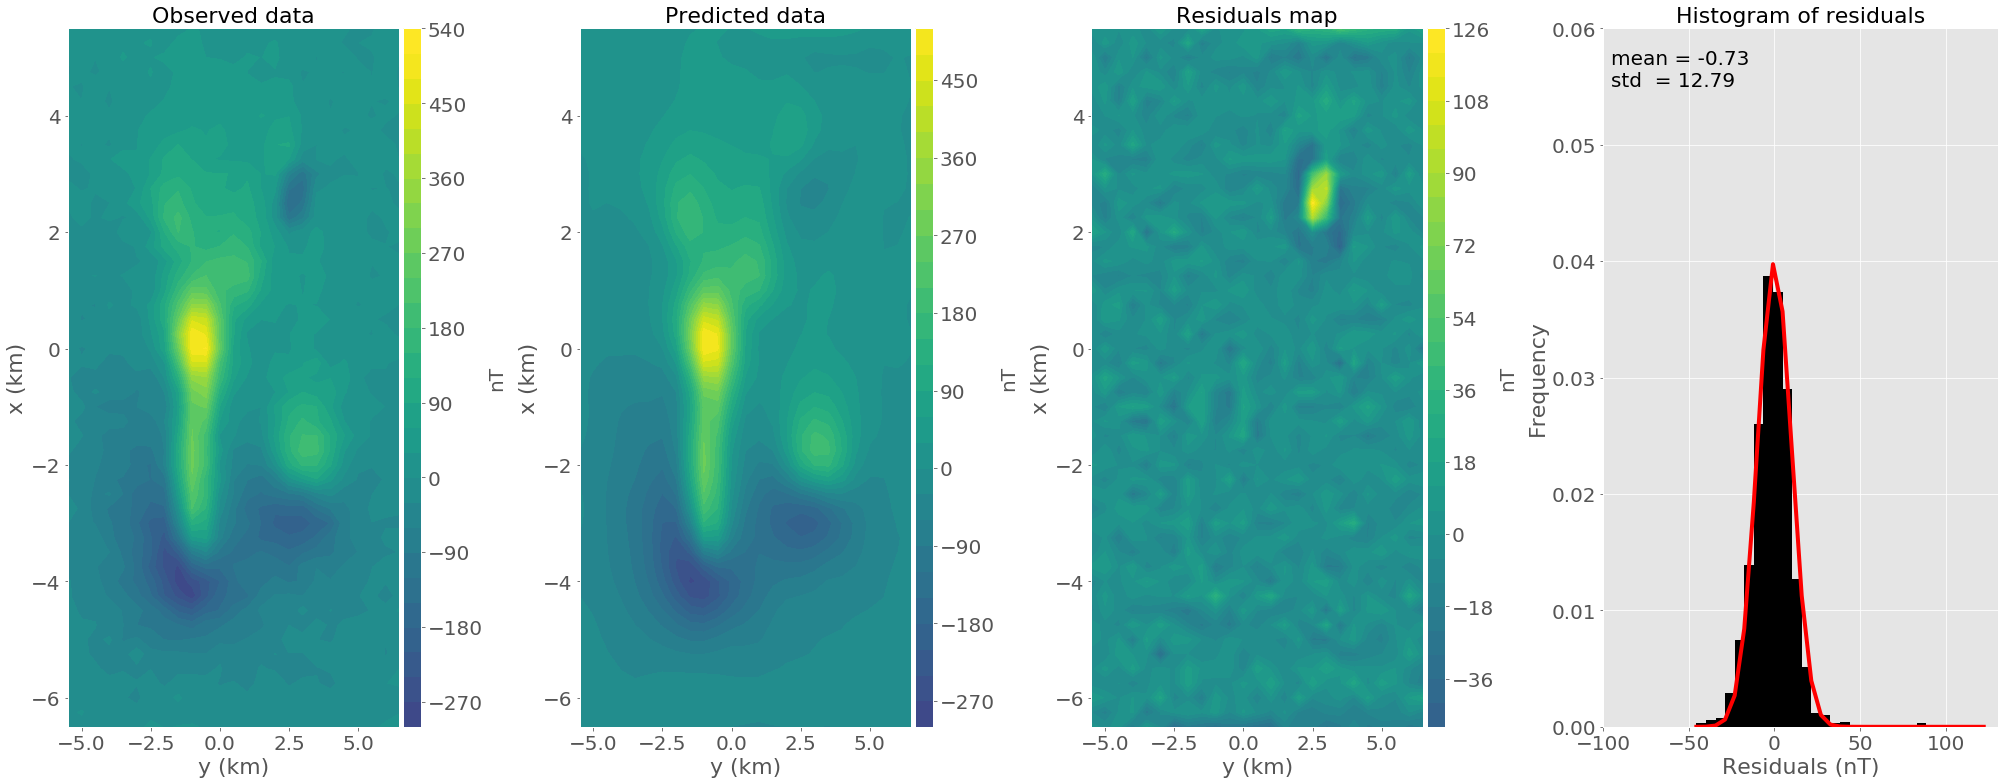

In [32]:
title_font = 22
bottom_font = 20
plt.figure(figsize=(28,11), tight_layout=True)

ranges = np.abs([data['tfa_obs_RM_airb'].max(),
                 data['tfa_obs_RM_airb'].min(),
                 pred.max(), pred.min()]).max()

ranges_r = np.abs([res.max(),res.min()]).max()

## Observed data plot
ax1=plt.subplot(1,4,1)

plt.title('Observed data', fontsize=title_font)
plt.xlabel('y (km)',fontsize = title_font)
plt.ylabel('x (km)',fontsize = title_font)
plt.contourf(1e-3*airborne['y'].reshape(airborne['shape']),
             1e-3*airborne['x'].reshape(airborne['shape']), 
             data['tfa_obs_RM_airb'].reshape(airborne['shape']),
             30, cmap='viridis',vmin=-ranges, vmax=ranges)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

## Predicted data plot
ax2=plt.subplot(1,4,2)

plt.title('Predicted data', fontsize=title_font)
plt.xlabel('y (km)',fontsize = title_font)
plt.ylabel('x (km)',fontsize = title_font)
plt.contourf(1e-3*airborne['y'].reshape(airborne['shape']),
             1e-3*airborne['x'].reshape(airborne['shape']),
             pred.reshape(airborne['shape']),
             30, cmap='viridis',  vmin=-ranges, vmax=ranges)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

## Residuals plot and histogram
ax3=plt.subplot(1,4,3)

plt.title('Residuals map', fontsize=title_font)
plt.xlabel('y (km)',fontsize = title_font)
plt.ylabel('x (km)',fontsize = title_font)
plt.contourf(1e-3*airborne['y'].reshape(airborne['shape']),
             1e-3*airborne['x'].reshape(airborne['shape']),
             res.reshape(airborne['shape']),
             30, cmap='viridis',  vmin=-ranges_r, vmax=ranges_r)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

ax4=plt.subplot(1,4,4)
plt.title('Histogram of residuals', fontsize =title_font)
plt.xlabel('Residuals (nT)', fontsize = title_font)
plt.ylabel('Frequency', fontsize = title_font)
plt.text(0.02, 0.97, "mean = {:.2f}\nstd  = {:.2f} ".format(np.mean(res), np.std(res)),
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax4.transAxes, fontsize=bottom_font)
n, bins, patches = plt.hist(res,bins=30, normed=True, facecolor='black')
gauss = mlab.normpdf(bins, 0., 10.)
plt.plot(bins, gauss, 'r-', linewidth=4.)
ax4.set_xticks([-100.0,-50.,0.0,50.,100.0])
ax4.set_yticks([.0,.010,.020,.030,.040,.05,.06])
plt.tick_params(axis='both', which='major', labelsize=bottom_font)


## 
file_name = 'figs/airborne/data_fitting_LM_NNLS_magRM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

## Positive magnetic-moment distribution

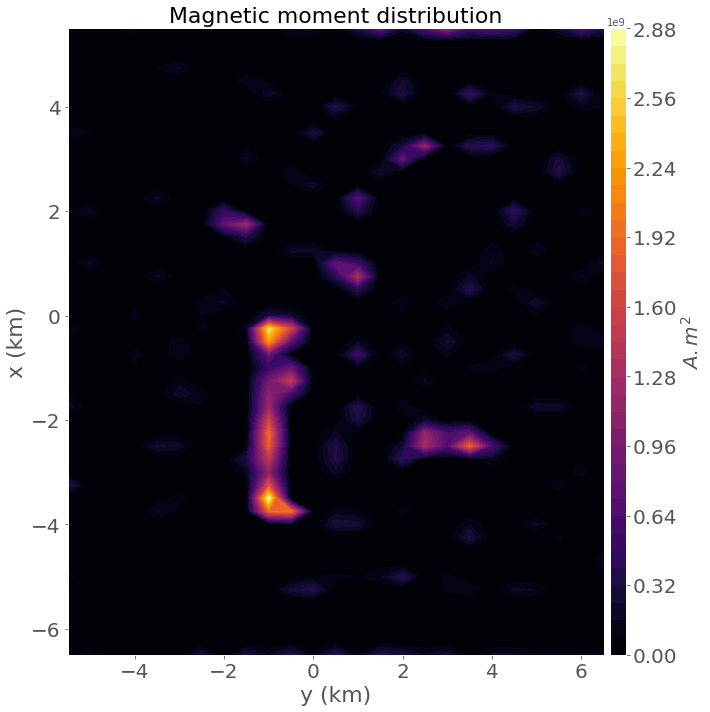

In [33]:
title_font = 22
bottom_font = 20
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.title('Magnetic moment distribution', fontsize=title_font)
plt.contourf(1e-3*ys.reshape(shape_layer),1e-3*xs.reshape(shape_layer), 
             m_LM.reshape(shape_layer), 40, cmap='inferno')
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('$A.m^2$',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)

file_name = 'figs/airborne/magnetic_moment_positive_LM_NNLS_magRM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

## Figure for paper

/home/andrelreis/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:71: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


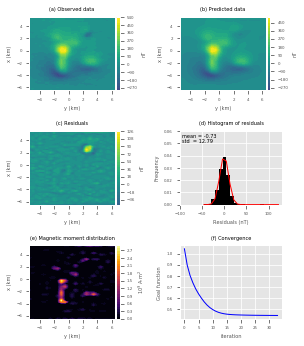

In [34]:
#title_font = 17
title_font = 5
#bottom_font = 14
bottom_font = 4
hist_font = 5

height_per_width = 17./15.
plt.figure(figsize=(4.33,4.33*height_per_width), tight_layout=True)

ranges = np.abs([data['tfa_obs_RM_airb'].max(),
                 data['tfa_obs_RM_airb'].min(),
                 pred.max(), pred.min()]).max()

ranges_r = np.abs([res.max(),res.min()]).max()

## Observed data plot
ax1=plt.subplot(3,2,1)

plt.title('(a) Observed data', fontsize=title_font)
plt.xlabel('y (km)',fontsize = title_font)
plt.ylabel('x (km)',fontsize = title_font)
plt.contourf(1e-3*airborne['y'].reshape(airborne['shape']),
             1e-3*airborne['x'].reshape(airborne['shape']), 
             data['tfa_obs_RM_airb'].reshape(airborne['shape']),
             30, cmap='viridis',vmin=-ranges, vmax=ranges)
cbar = plt.colorbar(pad=0.01, aspect=20, shrink=1.0)
cbar.set_label('nT',size=title_font)
cbar.ax.tick_params(labelsize=bottom_font)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(a) Observed data', fontsize=title_font)
plt.xlabel('y (km)',fontsize = title_font)
plt.ylabel('x (km)',fontsize = title_font)

## Predicted data plot
ax2=plt.subplot(3,2,2)

plt.contourf(1e-3*airborne['y'].reshape(airborne['shape']),
             1e-3*airborne['x'].reshape(airborne['shape']),
             pred.reshape(airborne['shape']),
             30, cmap='viridis',  vmin=-ranges, vmax=ranges)
cbar = plt.colorbar(pad=0.01, aspect=20, shrink=1.0)
cbar.set_label('nT',size=title_font)
cbar.ax.tick_params(labelsize=bottom_font)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(b) Predicted data', fontsize=title_font)
plt.xlabel('y (km)',fontsize = title_font)
plt.ylabel('x (km)',fontsize = title_font)

## Residuals plot and histogram
ax3=plt.subplot(3,2,3)

plt.contourf(1e-3*airborne['y'].reshape(airborne['shape']),
             1e-3*airborne['x'].reshape(airborne['shape']),
             res.reshape(airborne['shape']),
             30, cmap='viridis',  vmin=-ranges_r, vmax=ranges_r)
cbar = plt.colorbar(pad=0.01, aspect=20, shrink=1.0)
cbar.set_label('nT',size=title_font)
cbar.ax.tick_params(labelsize=bottom_font)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(c) Residuals', fontsize=title_font)
plt.xlabel('y (km)',fontsize = title_font)
plt.ylabel('x (km)',fontsize = title_font)


ax4= plt.subplot(3,2,4)
plt.text(0.02, 0.97, "mean = {:.2f}\nstd  = {:.2f} ".format(np.mean(res), np.std(res)),
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax4.transAxes, fontsize=hist_font)
n, bins, patches = plt.hist(res,bins=20, normed=True, facecolor='black')
gauss = mlab.normpdf(bins, 0., 10.)
plt.plot(bins, gauss, 'r-', linewidth=1.)
ax4.set_xticks([-100.0,-50.,0.0,50.,100.0])
ax4.set_yticks([.0,.010,.020,.030,.040,.05,.06])
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(d) Histogram of residuals', fontsize =title_font)
plt.xlabel('Residuals (nT)', fontsize = title_font)
plt.ylabel('Frequency', fontsize = title_font)

ax5= plt.subplot(3,2,5)
plt.contourf(1e-3*ys.reshape(shape_layer),1e-3*xs.reshape(shape_layer), 
             m_LM.reshape(shape_layer)*1e-9, 30, cmap='inferno')
cbar = plt.colorbar(pad=0.01, aspect=20, shrink=1.0)
cbar.set_label('$10^{9}$ A$\cdot$m$^2$',size=title_font)
cbar.ax.tick_params(labelsize=bottom_font)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(e) Magnetic moment distribution', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)

ax6= plt.subplot(3,2,6)
plt.plot(phi, 'b-',linewidth=1.0)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(f) Convergence', fontsize=title_font)
plt.xlabel('iteration', fontsize = title_font)
plt.ylabel('Goal function ', fontsize = title_font)

########################################################################### 
#file_name = 'figs/airborne/results_compiled_LM_NNLS_magRM'
file_name = 'figs/airborne/Fig3'
plt.savefig(file_name+'.png',dpi=1200)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=1200)
saved_files.append(file_name+'.eps')


plt.show()